# This notebook demonstrates a simple machine learning pipeline for predicting used car prices using regression algorithms. Below is a step-by-step explanation of the process:


1. **Imports and Data Loading**:
   - Import necessary libraries: `pandas`, `numpy`, `matplotlib`, `seaborn`, and `sklearn`.
   - Load the dataset from a CSV file into a DataFrame.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




# Load the dataset
used_cars_data = pd.read_csv('pakwheels_used_cars.csv')

# Display the first few rows of the dataset
print(used_cars_data.head())

    ad_ref  assembly       body ad_city                color  engine_cc  \
0  7927285  Imported        Van  Lahore          Pearl White     2000.0   
1  7679303  Imported  Hatchback  Lahore                 Grey      996.0   
2  7915479       NaN      Sedan  Lahore          Super white     1798.0   
3  7918380       NaN      Sedan  Lahore  Crystal Black Pearl     1500.0   
4  7676167  Imported        MPV  Lahore               Silver     3000.0   

  fuel_type    make  mileage    model     registered transmission    year  \
0    Hybrid  Nissan   124000   Serena  Un-Registered    Automatic  1905.0   
1    Petrol  Toyota    30738     Vitz         Punjab    Automatic  1905.0   
2    Petrol  Toyota   183000  Corolla         Punjab    Automatic  1905.0   
3    Petrol   Honda    41000    Civic         Punjab    Automatic  1905.0   
4    Petrol  Toyota   126000  Alphard         Punjab    Automatic  1905.0   

       price  
0  8990000.0  
1  4190000.0  
2  3990000.0  
3  6490000.0  
4  4750000.

2. **Data Preprocessing**:
   - **Handling Missing Values**:
     - Fill missing values in numeric columns with the mean of each column.
     - Fill missing values in categorical columns with the most frequent value (mode).
   - **Encoding Categorical Variables**:
     - Convert categorical variables to numerical using one-hot encoding.
   - **Feature Scaling**:
     - Normalize/standardize numeric features using `StandardScaler`.

In [37]:


# Handle missing values
# For numeric columns, fill missing values with the mean of that column
numeric_columns = used_cars_data.select_dtypes(include=[np.number]).columns
used_cars_data[numeric_columns] = used_cars_data[numeric_columns].fillna(used_cars_data[numeric_columns].mean())

# For categorical columns, fill missing values with the most frequent value (mode)
categorical_columns = used_cars_data.select_dtypes(include=[object]).columns
for col in categorical_columns:
    mode_value = used_cars_data[col].mode()[0]
    used_cars_data[col] = used_cars_data[col].fillna(mode_value)

# Convert categorical variables to numerical variables
used_cars_data = pd.get_dummies(used_cars_data, columns=categorical_columns)

# Normalize/standardize the numerical features
scaler = StandardScaler()
used_cars_data[numeric_columns] = scaler.fit_transform(used_cars_data[numeric_columns])



3. **Data Splitting**:
   - Split the dataset into training and testing sets with an 80-20 split.


In [40]:
# Split the data into training and testing sets
X_used_cars = used_cars_data.drop('price', axis=1)
y_used_cars = used_cars_data['price']
X_train_used_cars, X_test_used_cars, y_train_used_cars, y_test_used_cars = train_test_split(X_used_cars, y_used_cars, test_size=0.2, random_state=42)



4. **Data Visualization**:
   - Plot scatter plots to visualize relationships between features (`year`, `engine_cc`, `mileage`) and the target variable (`price`).
   - Add a horizontal line representing the mean price to these plots.


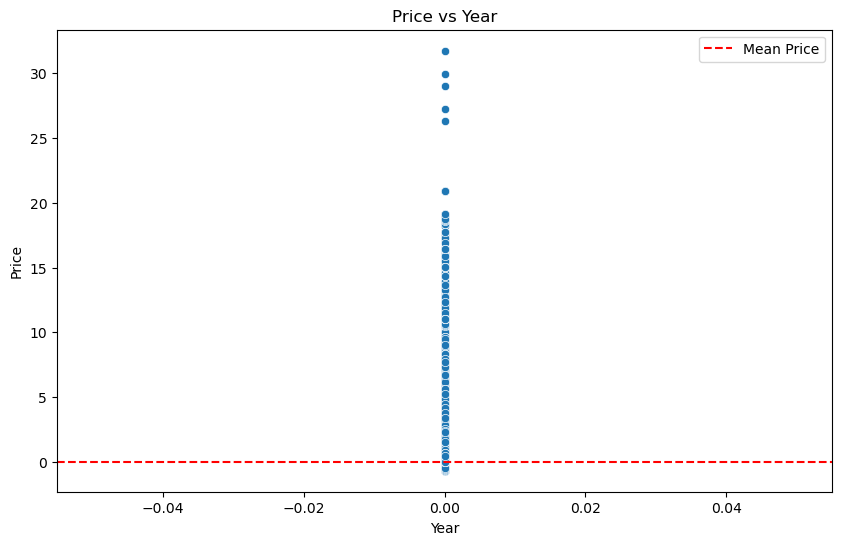

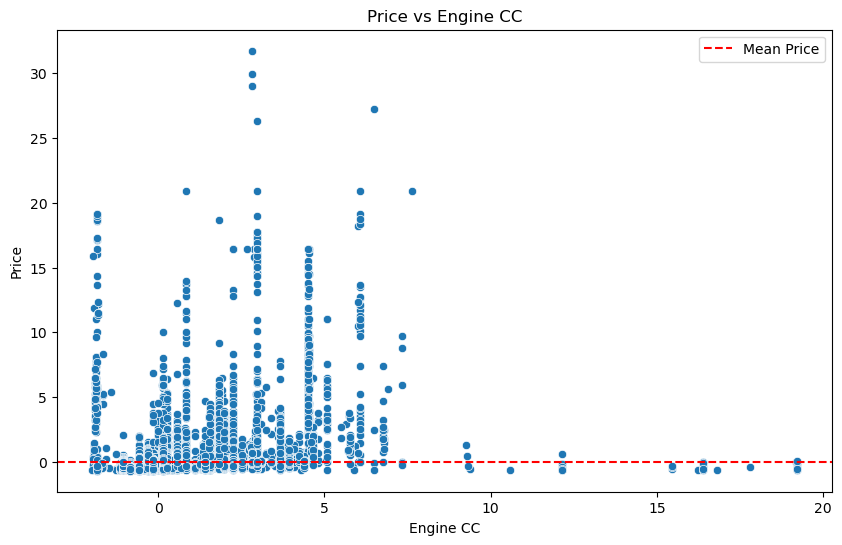

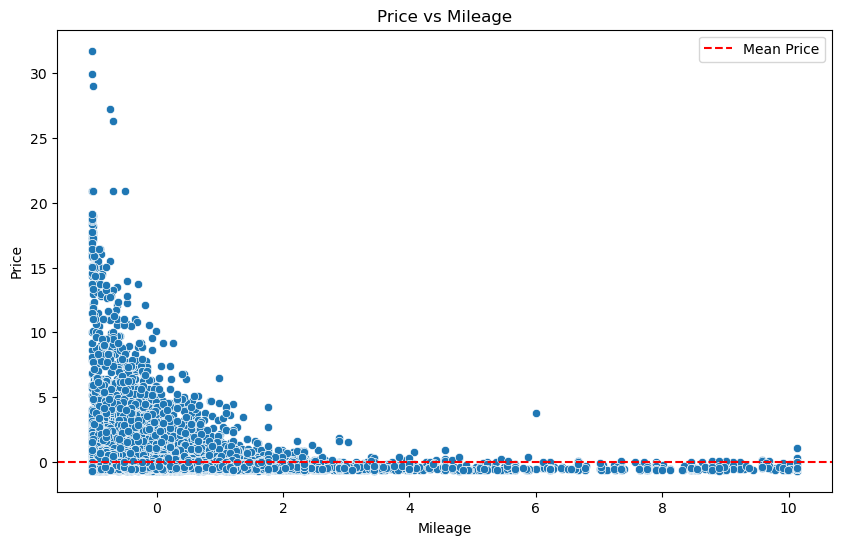

In [43]:
# Visualization of data
def plot_with_mean_line(x, y, x_label, y_label, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y)
    mean_price = y.mean()
    plt.axhline(y=mean_price, color='r', linestyle='--', label='Mean Price')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

plot_with_mean_line(used_cars_data['year'], used_cars_data['price'], 'Year', 'Price', 'Price vs Year')
plot_with_mean_line(used_cars_data['engine_cc'], used_cars_data['price'], 'Engine CC', 'Price', 'Price vs Engine CC')
plot_with_mean_line(used_cars_data['mileage'], used_cars_data['price'], 'Mileage', 'Price', 'Price vs Mileage')



5. **Regression Models**:
   - Apply three regression algorithms: Linear Regression, Ridge Regression, and Lasso Regression.
   - Fit each model to the training data and make predictions on the test data.


In [46]:

# Apply regression algorithms to the dataset
linear_regressor = LinearRegression()
ridge_regressor = Ridge()
lasso_regressor = Lasso()

linear_regressor.fit(X_train_used_cars, y_train_used_cars)
ridge_regressor.fit(X_train_used_cars, y_train_used_cars)
lasso_regressor.fit(X_train_used_cars, y_train_used_cars)

y_pred_linear = linear_regressor.predict(X_test_used_cars)
y_pred_ridge = ridge_regressor.predict(X_test_used_cars)
y_pred_lasso = lasso_regressor.predict(X_test_used_cars)



6. **Model Evaluation**:
   - Compute and print performance metrics for each model, including:
     - Mean Squared Error (MSE)
     - Mean Absolute Error (MAE)
     - R-squared (R2) Score


In [49]:
print("Linear Regression MSE:", mean_squared_error(y_test_used_cars, y_pred_linear))
print("Ridge Regression MSE:", mean_squared_error(y_test_used_cars, y_pred_ridge))
print("Lasso Regression MSE:", mean_squared_error(y_test_used_cars, y_pred_lasso))

print("Linear Regression MAE:", mean_absolute_error(y_test_used_cars, y_pred_linear))
print("Ridge Regression MAE:", mean_absolute_error(y_test_used_cars, y_pred_ridge))
print("Lasso Regression MAE:", mean_absolute_error(y_test_used_cars, y_pred_lasso))

print("Linear Regression R2:", r2_score(y_test_used_cars, y_pred_linear))
print("Ridge Regression R2:", r2_score(y_test_used_cars, y_pred_ridge))
print("Lasso Regression R2:", r2_score(y_test_used_cars, y_pred_lasso))

Linear Regression MSE: 8.965149035482346e+17
Ridge Regression MSE: 0.371212520618858
Lasso Regression MSE: 0.9761072919224231
Linear Regression MAE: 29418164.8615599
Ridge Regression MAE: 0.23659938468534608
Lasso Regression MAE: 0.46244668560609736
Linear Regression R2: -9.184661817919428e+17
Ridge Regression R2: 0.6196982949231902
Lasso Regression R2: -7.399634964544433e-06


## Conclusion

The performance metrics of the regression models indicate varying degrees of effectiveness in predicting used car prices:

- **Linear Regression**:
  - **MSE**: 8.97e+17 (Very high)
  - **MAE**: 29,418,164.86 (Very high)
  - **R2**: -9.18e+17 (Negative, indicating poor fit)
  
  The Linear Regression model has very high errors (both MSE and MAE) and a negative R2 score, suggesting that it performs poorly on this dataset and does not capture the variability in car prices effectively.

- **Ridge Regression**:
  - **MSE**: 0.37 (Relatively low)
  - **MAE**: 0.24 (Low)
  - **R2**: 0.62 (Moderate to good fit)
  
  Ridge Regression shows significantly better performance with lower MSE and MAE, and a positive R2 score, indicating that it better captures the relationship between features and car prices compared to Linear Regression.

- **Lasso Regression**:
  - **MSE**: 0.98 (Moderately low)
  - **MAE**: 0.46 (Moderate)
  - **R2**: -7.40e-06 (Very close to zero and negative)
  
  Lasso Regression also performs better than Linear Regression but is less effective compared to Ridge Regression, as evidenced by its higher MSE, MAE, and near-zero R2 score.

In summary, Ridge Regression is the most effective model among those tested, providing a better fit for predicting used car prices than both Linear and Lasso Regression models. Adjustments and further tuning might be necessary to improve model performance and address potential issues with feature selection or preprocessing.
